# Введение
В предыдущих модулях вы видели, как работать с данными. В реальных проектах данные зачастую не лежат в готовом виде, и для анализа вам нужно сначала их собрать, например, скопировав со сторонних веб-сайтов.

В этом модуле мы рассмотрим, как Python позволяет упростить подобный сбор информации и даже получить доступ к данным, которые руками собрать невозможно. В частности, мы рассмотрим:
- в каком виде информация обычно располагается в интернете;
- напишем скрипты, которые собирают данные с веб-сайтов, используя библиотеки requests и BeautifulSoup;
- разберёмся, что такое программный интерфейс веб-сервисов (API) и как его использовать; для примера мы будем забирать данные из ВКонтакте.

К концу модуля вы сможете писать программы, которые могут избавить вас от многих часов монотонной работы и расширят спектр собираемой информации.

# 1. Web-запросы
Начнем с основ автоматизированных веб-запросов на примере задачи получения курсов валют. Курс валют – полезная и регулярно обновляемая информация, но залезать каждый раз на сайт за ней – трудоёмко. Значит, вам нужен скрипт, который будет в удобном виде выгружать информацию по курсам валют.

Будем использовать сервис cbr-xml-daily.ru (https://www.cbr-xml-daily.ru/daily_json.js). Он возвращает информацию о курсах валют в структурированном формате JSON, и в дальнейшем мы расширим этот подход на произвольные html страницы.

Итак, нам необходима функция, возвращающая курс заданной валюты в двух форматах:

1. Только значение курса валюты.

2. Полную информацию о валюте: курс, название, номинал и другие характеристики.

## Протокол HTTP
Мы будем работать с веб-запросами, и для начала полезно будет вспомнить, как работает интернет.

Один компьютер (клиент) отправляет запрос в определённом формате другому компьютеру (серверу) и получает в ответ текст и мультимедийные файлы (картинки, видео). Обычно это происходит по протоколу http, который формализует это общение.
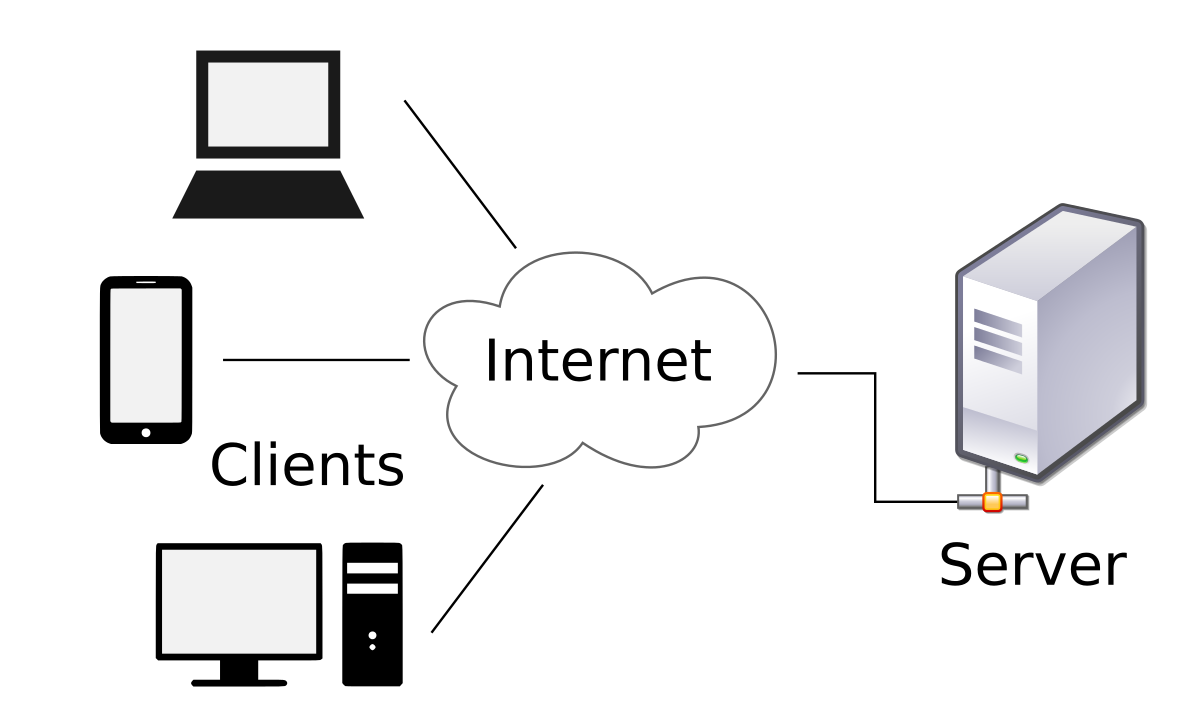
Запрос в http состоит из нескольких частей:
- адрес, по которому мы обращаемся (это то, что вы вводите в строке браузера, например, www.google.com);
- техническая информация, вроде кукисов и метода запроса;
- иногда ещё дополнительные данные, например, если вы сами загружаете картинку.

Ответ содержит:
- статус ответа: 200 для успешного ответа; 404, если адрес не найден и т.д.; полный список http статусов можно посмотреть здесь ;
- текст в запрошенном формате (html, xml, json...) или мультимедийные файлы; 
- техническую информацию.

В протоколе HTTP запросы могут делаться с помощью одного из так называемых методов. Самые популярные — это GET и POST .
- Метод GET просто получает текстовую информацию или мультимедийный файл по адресу. Вы как бы говорите: "Хочу получить страницу по адресу www.google.com" , и сервер вам отвечает: "200, ок, держи вот html". Это самый базовый метод.
- Метод POST служит для отправки форм; помимо адреса он может "заворачивать" в себя дополнительные данные, вроде полей формы или картинок. Вы как бы "заворачиваете" посылку и отдаёте её почтальону. 

Обычно всю эту работу делает браузер, но мы можем делать эти же запросы из кода. Мы могли бы даже написать свой маленький браузер на python, но в этом модуле мы сосредоточимся на автоматическом сборе информации.

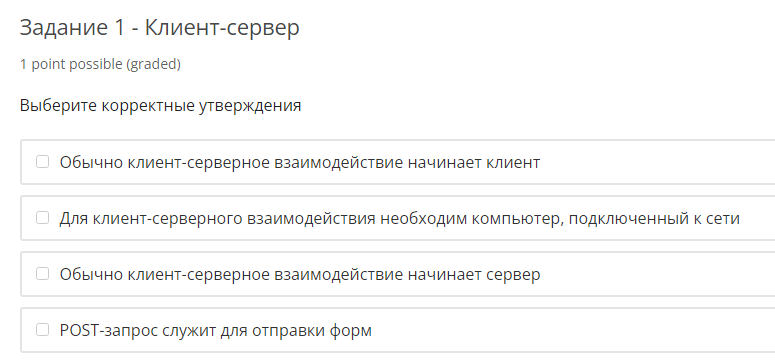

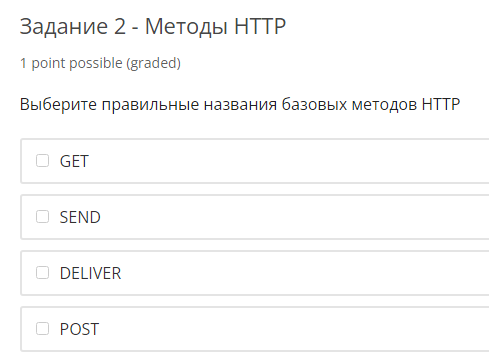

# 2. Библиотека requests
Сначала разберемся, как получить информацию с внешнего сервиса. В стандартной библиотеке есть модуль urllib2, который может справиться с этой задачей. Однако большинство разработчиков используют стороннюю библиотеку requests, потому что в ней лучше реализованы большинство методов и код получается проще. Перед началом работы библиотеку потребуется установить с помощью вашего пакетного менеджера, например, с помощью следующей команды в консоли.
```
python -m pip install requests  
```
Далее мы импортируем библиотеку и отправим запрос к сервису с помощью метода GET к сервису с курсами валют:
```
import requests  
response = requests.get('https://www.cbr-xml-daily.ru/daily_json.js')  
```
Посмотрим, что получили в ответ:
```
print(response)  
# => <Response [200]>  
```
Мы получили объект ответа, который содержит всю нужную нам информацию. По умолчанию на экран выводится HTTP-код ответа 200. Это означает, что запрос был корректным, и сервер отдал нам нужную информацию.

Код ответа в виде числа можно получить с помощью метода status_code:
```
print(response.status_code)  
#=> 200  
```

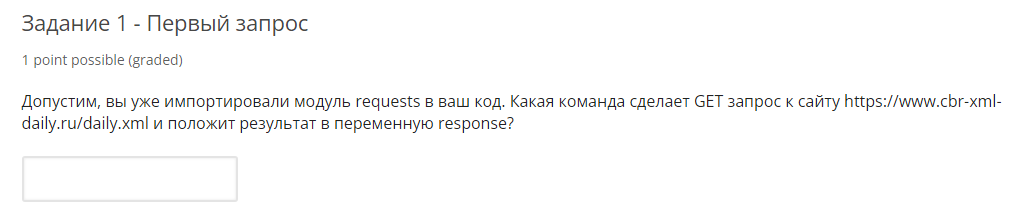

# 3. Читаем результат
Мы сделали запрос и получили ответ. Давайте теперь посмотрим, как считывать текст. 

Адрес, по которому мы обращались, возвращает результат в json формате. Эти данные уже лежат в атрибуте text в полученном ответе response:
```
import requests    
response = requests.get('https://www.cbr-xml-daily.ru/daily_json.js')    
print(response.text)  
# => {  
#     "Date": "2019-06-01T11:30:00+03:00",  
#     "PreviousDate": "2019-05-31T11:30:00+03:00",  
#     "PreviousURL": "\/\/www.cbr-xml-daily.ru\/archive\/2019\/05\/31\/daily_json.js",  
#     "Timestamp": "2019-06-02T23:00:00+03:00",  
#     "Valute": {  
#         "AUD": {  
#             "ID": "R01010",  
#             "NumCode": "036",  
#             "CharCode": "AUD",  
# ...  
```
Вы можете посмотреть на полный текст, повторив запрос или на этой странице в вашем браузере.

Сейчас текст хранится просто в строковой переменной. Далее мы можем превратить эту строку в словарь. Сделать это можно с помощью JSON-парсера python, либо воспользовавшись методом json, который уже встроен в объект ответа response:
```
currencies = response.json()  
print(currencies)  
# => {'Date': '2019-06-01T11:30:00+03:00',  
#  'PreviousDate': '2019-05-31T11:30:00+03:00',  
#  'PreviousURL': '//www.cbr-xml-daily.ru/archive/2019/05/31/daily_json.js',  
#  'Timestamp': '2019-06-02T23:00:00+03:00',  
#  'Valute': {'AMD': {'CharCode': 'AMD',  
#                     'ID': 'R01060',  
#                     'Name': 'Армянских драмов',  
#                     'Nominal': 100,  
#                     'NumCode': '051',  
#                     'Previous': 13.5538,  
# ...  
```
Теперь данные лежат в словаре, и мы можем легко получать необходимые нам значения:
```
currencies['Valute']['UAH']  
# => {'ID': 'R01720',  
#  'NumCode': '980',  
#  'CharCode': 'UAH',  
#  'Nominal': 10,  
#  'Name': 'Украинских гривен',  
#  'Value': 24.333,  
#  'Previous': 24.1673}  
```
Данные получены, и задание выполнено. 

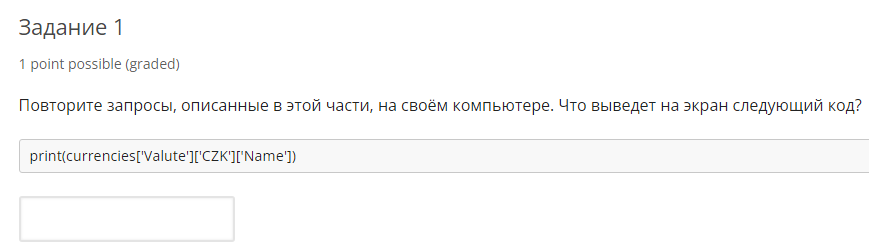

# 4. Оформляем функцию
Оформляем функцию
В завершение давайте оформим наши вычисления в отдельную функцию, которой будет удобно пользоваться. На вход она должна принимать два параметра:

1. Название валюты currency. Например, 'EUR' или 'USD'.

2. Формат ответа format. При значении 'full' будем отдавать все, что знаем о валюте. Например, для currency = 'USD':
```
{'CharCode': 'USD',  
   'ID': 'R01235',  
   'Name': 'Доллар США',  
   'Nominal': 1,  
   'NumCode': '840',  
   'Previous': 68.2505,  
   'Value': 69.0286}  
```
А при значении format = 'value' только значение ключа 'Value', т. е. курс: 69.0286.

Оформим наши требования в коде:
```
def exchange_rates(currency, format='full'):    
    url = 'https://www.cbr-xml-daily.ru/daily_json.js'  
    response = requests.get(url).json()['Valute']    
    data = response[currency]     
    if format == 'full':    
        return data      
    elif format == 'value':    
        return data['Value']    
```

# Задание 1
Напишите функцию currency_name, которая по ID валюты возвращает ее название на русском языке.
```
currency_name('R01700J')
#=> 'Турецких лир' 
```

# 5. HTML-страницы
Довольно часто приходится добывать информацию не из удобно форматированного json-файла, а прямо с HTML-страниц. Получить содержимое страницы в большинстве случаев несложно, труднее извлечь из HTML-кода нужную информацию. В качестве примера мы рассмотрим страницу новости (https://nplus1.ru/news/2019/06/04/slothbot), из которой будем доставать полезную информацию: 1) заголовок страницы; 2) дату публикации; 3) текст публикации; 4) ссылки на странице.

## Получаем данные
Получить html страницу можно так же, как мы получали до этого json: используем библиотеку requests и метод GET:  
```
import requests  
  
url = 'https://nplus1.ru/news/2019/06/04/slothbot'   
  
response = requests.get(url)  
  
# Убедимся, что мы успешно получили ответ     
print(response.status_code)    
# => 200   
  
# Выведем полученные данные    
print(response.text)   
  
# => <!doctype html>  
# <html class="no-js bg-fixed _no-bg" style="background-image:url(https://nplus1.ru/images/2019/06/04/b32b62189fb87cce895e229e1d6d27b4.jpeg)" lang="">  
# <head>  
#     <meta charset="utf-8">  
#     <meta http-equiv="x-ua-compatible" content="ie=edge">  
#     <meta name="viewport" content="width=device-width, initial-scale=1">  
# ..  
```
Мы получили большую строку с текстом в формате html, который используется для визуальной разметки. Это позволяет делать информацию более наглядной для людей, но в отличие от json, мы не можем просто преобразовать его напрямую в словарь. Далее мы посмотрим, как извлекать информацию из подобных страниц

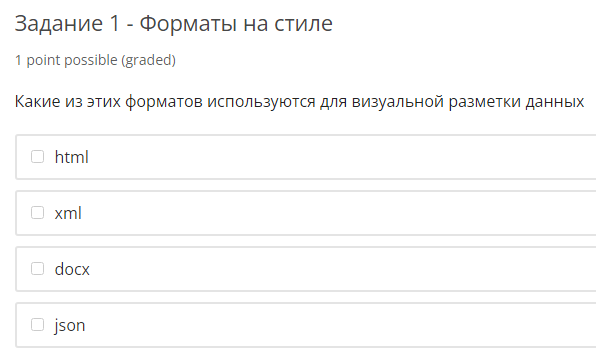

# 6. Основы HTML
Прежде чем перейти к поиску информации в html, давайте вспомним, что он из себя представляет.

HTML – формат разметки страниц, созданный специально для интернета. Он позволяет разбивать страницу на блоки: мы размечаем, что окажется в боковой колонке, а что – посередине  и т.д.  Также он используется для описания стилей отображения: например, что будет отображаться как заголовок с большим текстом, а что – как обычный текст.

HTML является близким родственником XML. Разметка делается с помощью так называемых тэгов, которые помещаются в угловые скобки, и сами, в свою очередь, являются как бы скобками для текста внутри.
```
<h2> Это заголовок </h2>  
<div> А это обычный текст </div>  
```
У корректной html страницы есть заголовок (head) и тело страницы (body). В заголовке заключается техническая информация, подключаются скрипты и стили. В теле находится текст и данные, которые непосредственно  отображаются на странице в браузере. 

Разметка небольшой страницы выглядит примерно так:
```
<!DOCTYPE html>  
<html lang="ru">  
    <header>  
        <title>Название страницы</title>  
        <meta charset="UTF-8">  
    </header>  
  
    <body>  
        <h1>Заголовок страницы</h1>  
        <p>Какой-то текст</p>  
    </body>  
</html>  
```
Вы можете сохранить это в текстовый файл с расширением .html и открыть в браузере.
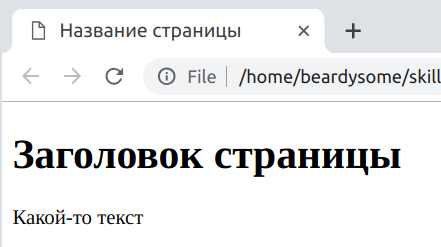

Тут стоит заметить, что тэги образуют иерархическую структуру, т.е. одни тэги расположены внутри других. В примере выше тэг ```<p>``` находится внутри тэга ```<body>```


Кроме того, у тэгов могут быть атрибуты, они пишутся внутри открывающегося тэга. Самые популярные атрибуты – это class и id.
```
<h1 id="big-title">Заголовок страницы</h1>
<p class="red-back">Какой-то текст</p>
```
Полное описание возможностей html находится вне рамок этого курса. Вы можете подробнее почитать о нём здесь. 

К счастью, нам и не нужно как-то подробно знать html, чтобы забирать информацию. Достаточно понимать, что:

есть тэги с разными именами;
у тэгов бывают атрибуты, вроде class и id;
тэги образуют иерархическую структуру, то есть одни тэги вложены в другие.

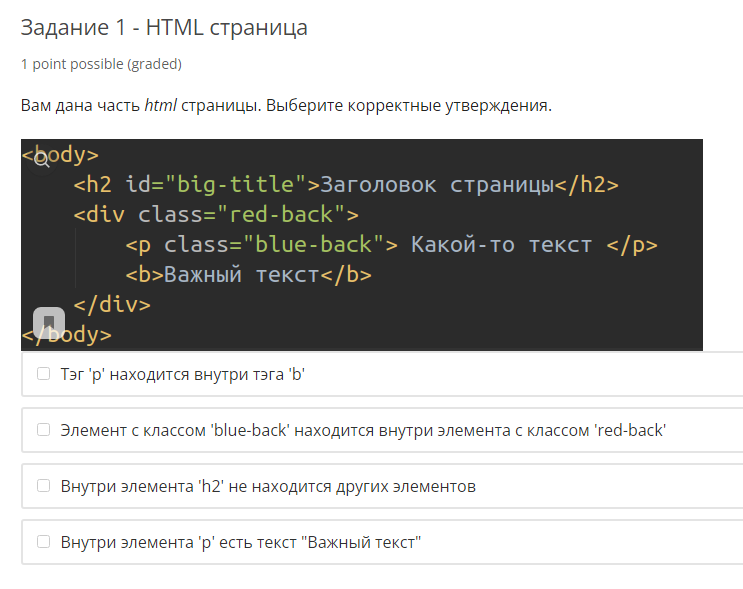

# 7. Библиотека BeautifulSoup
Для поиска данных на странице воспользуемся библиотекой BeautifulSoup. Она позволяет по названию тэгов и их атрибутов получать содержащийся в них текст.

Она не является частью стандартной библиотеки, поэтому для начала её нужно установить с помощью пакетного менеджера, например, введя в консоли:
```
pip install beautifulsoup4  
```
Теперь мы можем получать данные из страницы. Давайте получим title (это строка, отображающая в браузерах на закладках)
```
# Импортируем наши библиотеки    
from bs4 import BeautifulSoup    
import requests    
    
# Получаем данные, как и ранее    
url = 'https://nplus1.ru/news/2019/06/04/slothbot'   
response = requests.get(url)    
    
# Теперь создадим объект BeautifulSoup, указывая html парсер    
page = BeautifulSoup(response.text, 'html.parser')    
    
# Всё готово, чтобы получать данные из страницы    
# Для начала получим title, отображающийся на закладках браузера    
print(page.title)  
# => <title>Робота-ленивца научили лазать по паутине из тросов</title>  
    
# Мы получили тэг. Чтобы достать из него текст, вызовем атрибут text    
page.title.text    
# => 'Робота-ленивца научили лазать по паутине из тросов'  
```

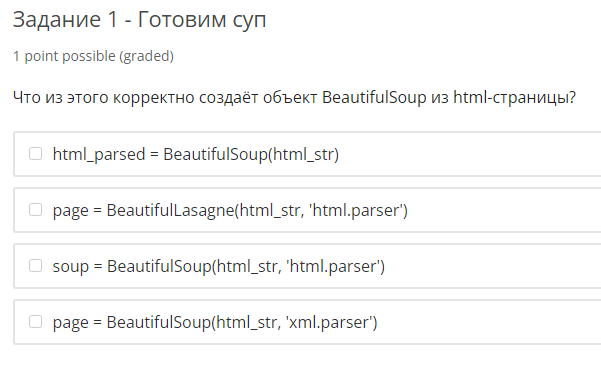

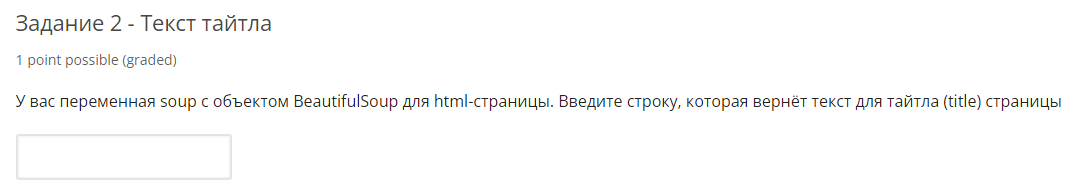

# 8. Данные со страницы
Читаем заголовок

Мы получили данные из title, но как нам забрать текст с самой страницы? Мы можем сделать это, запросив содержимое определённых тэгов. 

Пусть мы знаем, что заголовок статьи находится в тэге h1. Тогда мы можем получить его текст с помощью метода find
```
print(page.find('h1').text)   
# => Робота-ленивца научили лазать по паутине из тросов  
```
Как узнать, какой именно тэг нужен? Проще всего это сделать с помощью "инструментов разработчика", которые есть во всех современных браузерах. Открыть их можно двумя способами:

1. Можно нажать на желаемый элемент правой кнопкой мыши и выбрать "Inspect" из выпадающего списка. 
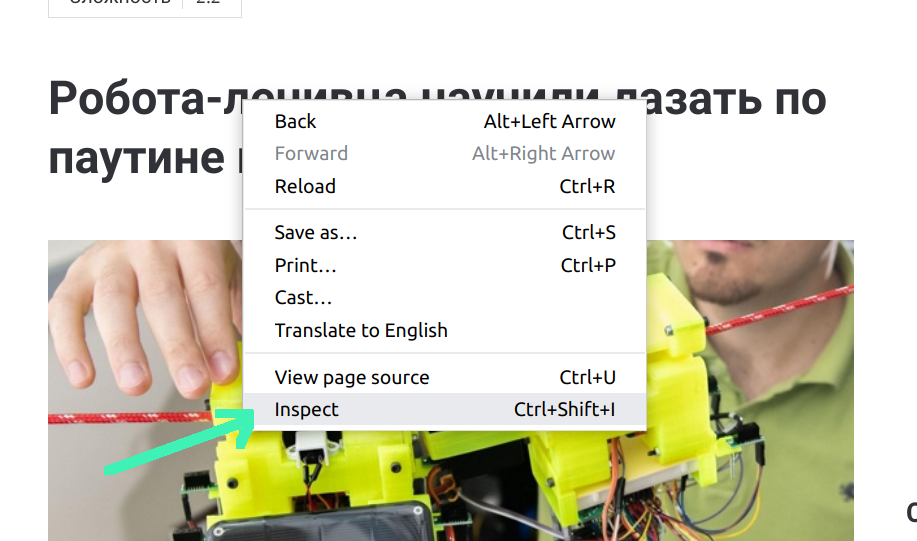
Откроется панель, где мы можем понять, что это за элемент
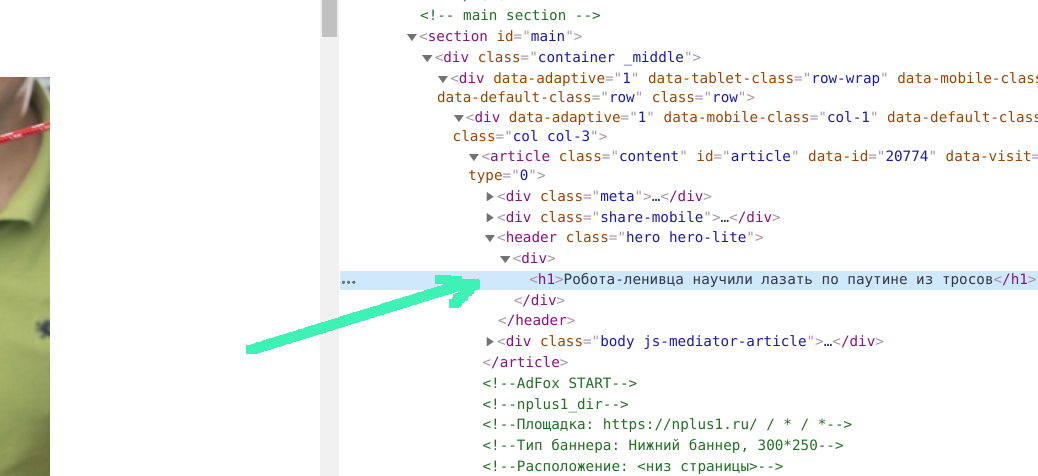
2.  Нажать горячие клавиши (ctrl-shift-i в chrome или ctrl-shift-c в firefox), которые откроют эту же панель и дальше найти элемент.

Воспользовавшись этим подходом, давайте получим время написания статьи. Смотрим, в каком она тэге
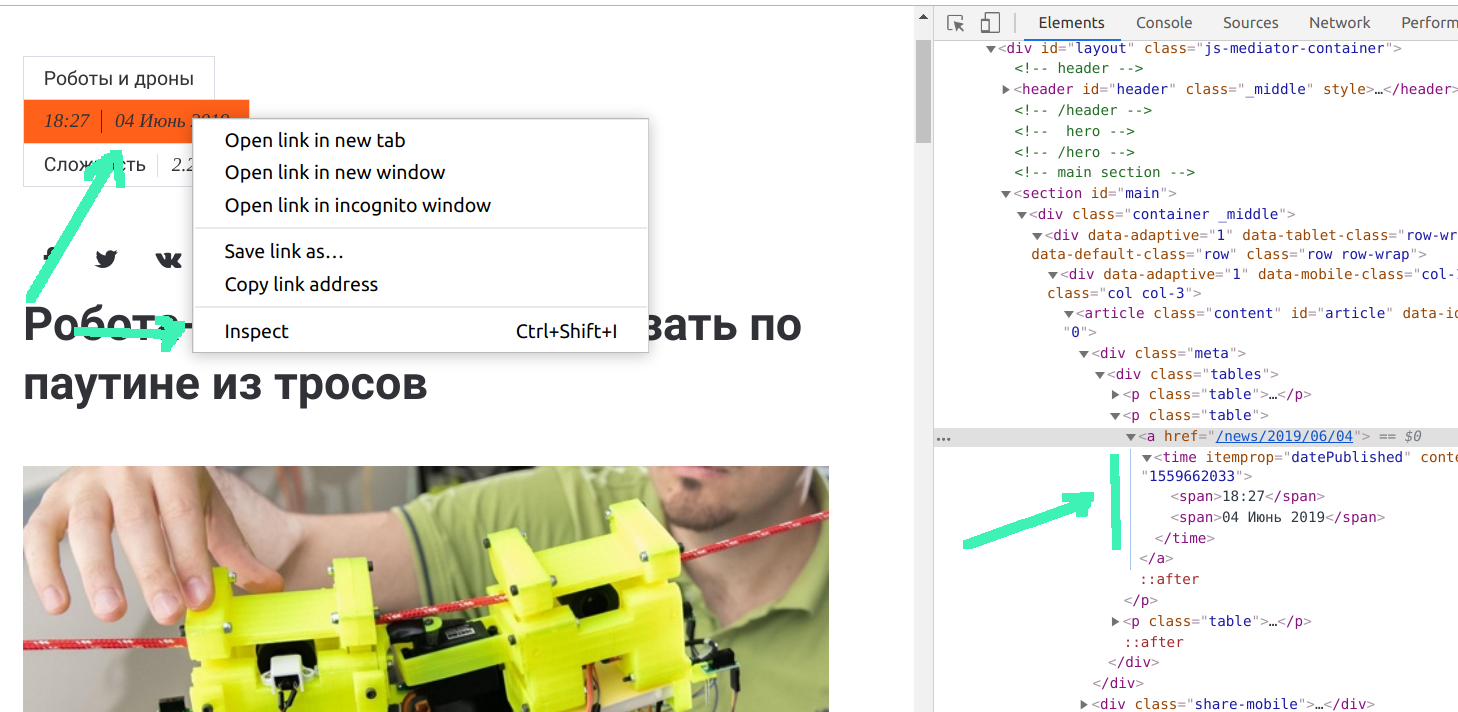
Видим, что это тэг time. Получим данные.
```
print(page.find('time').text)   
# => 18:27  
# 04 Июнь 2019  
```

# Задание 1 - Заголовок в Википедии
Используя инструменты для разработчиков в браузере, определите, в каком тэге лежит большой заголовок на странице в википедии
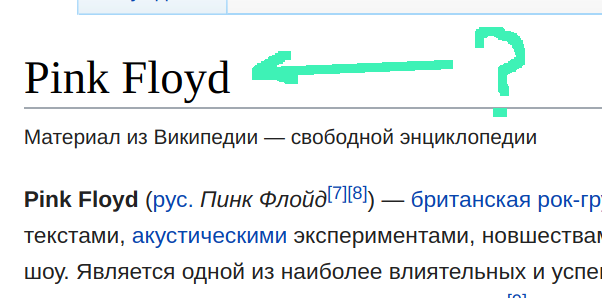

# Задание 2 - Автоматический сбор заголовков
Напишите функцию wiki_header, которая по адресу страницы возвращает заголовок для статей на википедии
```
wiki_header('https://en.wikipedia.org/wiki/Operating_system')
# => 'Operating system'
```

# 9. Больше данных
Больше данных
Мы рассмотрели базовый поиск конкретного элемента. Могут встречаться другие вариации:

когда нам нужно получить много похожих элементов; 
когда тэг атрибута неуникальный, тогда нам нужно использовать атрибуты (id, class), либо использовать вложенность.
Посмотрим на практике, что делать в случае, когда тэг элемента неуникальный. Пусть мы хотим получить сам текст статьи. Мы видим, что он находится в тэге div
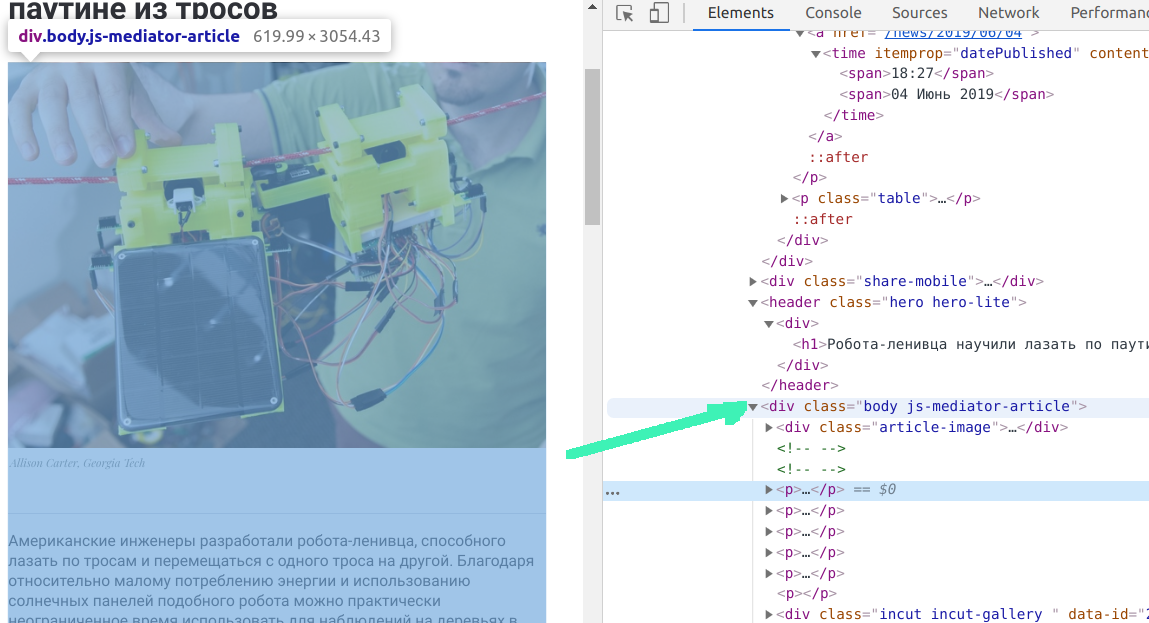
Тэги div очень распространённые, их много на странице. Если мы просто используем find, то получим первый попавшийся, но это не то, что нам надо.
```
print(page.find('div').text)  
# window.Ya.adfoxCode.create({  
#     ownerId: 248569,  
#     containerId: 'adfox_15000335664353901',  
#     params: {  
#         pp: 'g',  
# ...  
```
Тут мы можем заметить, что у искомого текста есть свой класс body js-mediator-article. Воспользуемся этим:  в метод find можно передать аргумент class_. Стоит обратить внимание на то, что поиск идет по вхождению (а не полному совпадению = равенству) текста в реальный атрибут.
```
print(page.find('div', class_='body').text)  
# => Allison Carter, Georgia Tech  
# Американские инженеры&nbsp;разработали робота-ленивца, способного лазать  
# ...  
```
Отлично, сработало. Аналогично работает и с id, мы могли бы написать что-то вроде page.find('article', id='article').text

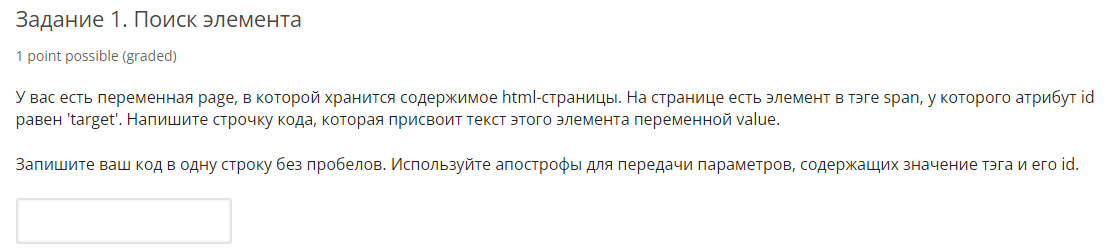

# 10. Сбор нескольких элементов
Рассмотрим случай, когда нам нужно сразу много элементов. Пусть мы хотим получить название всех ссылок на странице в википедии про языки программирования.

Для ссылок существует тэг <a></a>.  Давайте попробуем использовать find  
```
url = 'https://en.wikipedia.org/wiki/List_of_programming_languages'  
  
response = requests.get(url)  
page = BeautifulSoup(response.text, 'html.parser')  
page.find('a')  
# => <a id="top"></a>  
```
Что-то пошло не так, и мы получили только одну ссылку, хотя на странице их явно больше. Это происходит, потому что метод find возвращает только первый подходящий элемент. Если нам надо их больше, нужно воспользоваться методом find_all
```
links = page.find_all('a')  
# Посмотрим, сколько всего мы получили  
print(len(links))
# => 935
  
# Посмотрим на некоторые из ссылок  
print([link.text for link in links[500:510]])  
# => ['Oxygene', 'Oz', 'edit', 'P', 'P4', 'P′′', 'ParaSail (programming language)', 'PARI/GP', 'Pascal', 'Pascal Script']
['Oz', 'edit', 'P', 'P4', 'P′′', 'ParaSail (programming language)', 'PARI/GP', 'Pascal', 'Pascal Script', 'PCASTL']
```
Ещё одна полезная вещь:  последовательный поиск, т.е. мы можем найти сначала один элемент, а потом сделать внутри него второй поиск. Давайте выведем названия всех ссылок для языков программирования, которые начинаются на литеру "A".
```
# Получаем все элементы с тегом 'div' и классом 'div-col'  
all_blocks = page.find_all('div', class_='div-col')  
  
# Выбираем первый по счету блок  
first_block = all_blocks[0]  
# Берём оттуда ссылки (ограничимся первыми десятью)
links = first_block.find_all('a')
print([link.text for link in links[:10]])
# => ['1C:Enterprise programming language']
['A.NET', 'A-0 System', 'A+', 'ABAP', 'ABC', 'ABC ALGOL', 'ACC', 'Accent', 'Ace DASL (Distributed Application Specification Language)', 'Action!']
```
В заключение заметим, что BeautifulSoup – достаточно мощная библиотека. Мы рассмотрели базовые возможности, но полный список гораздо шире. С ним можно ознакомиться в официальной документации.

Задание 1 - Актёры
Напишите функцию get_actors, которая по ссылке на страницу фильма на кинопоиске (https://www.kinopoisk.ru/top/lists/) возвращает список актёров из колонки справа.
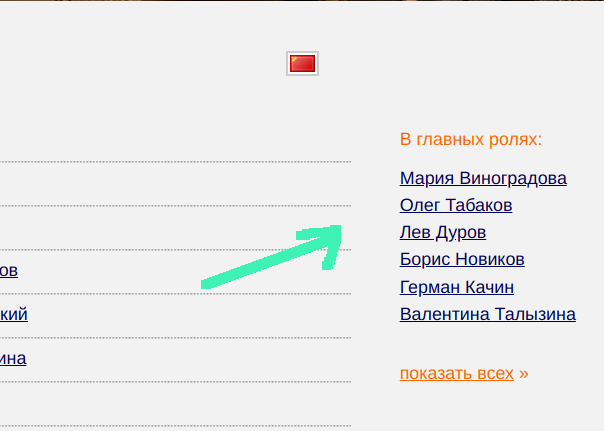
NB: Если делать запросы слишком часто, Кинопоиск начинает выдавать капчу (https://ru.wikipedia.org/wiki/Капча), поэтому старайтесь при отладке не делать больше одного запроса в секунду.

ВНИМАНИЕ! В настоящий момент времени на сайте Кинопоиска изменилась структура контента и применяется более интеллектуальная капча. Задание находится на стадии доработки и не обязательно для выполнения.
```
get_actors('https://www.kinopoisk.ru/film/42326/')
# => ['Мария Виноградова', 'Олег Табаков', 'Лев Дуров', 'Борис Новиков', 'Герман Качин', 'Валентина Талызина']
  
get_actors('https://www.kinopoisk.ru/film/326/')
# => ['Тим Роббинс', 'Морган Фриман', 'Боб Гантон', 'Уильям Сэдлер', 'Клэнси Браун', 'Джил Беллоуз', 'Марк Ролстон', 'Джеймс Уитмор', 'Джеффри ДеМанн', 'Ларри Бранденбург', '...', 'Диомид Виноградов', 'Игорь Старосельцев', 'Никита Прозоровский', 'Олег Вирозуб', 'Василий Дахненко', '...']
```

# 11. HTML-таблицы
Постановка задачи
При работе с web-страницами было бы здорово получать содержимое  таблиц в виде датафрейма. Рассмотрим страницу Центрального банка РФ cbr.ru (http://cbr.ru/). Наша задача будет состоять в том, чтобы получить одну из таблиц виджетов в виде датафрейма. Например, таблицу цен на драгоценные металлы.
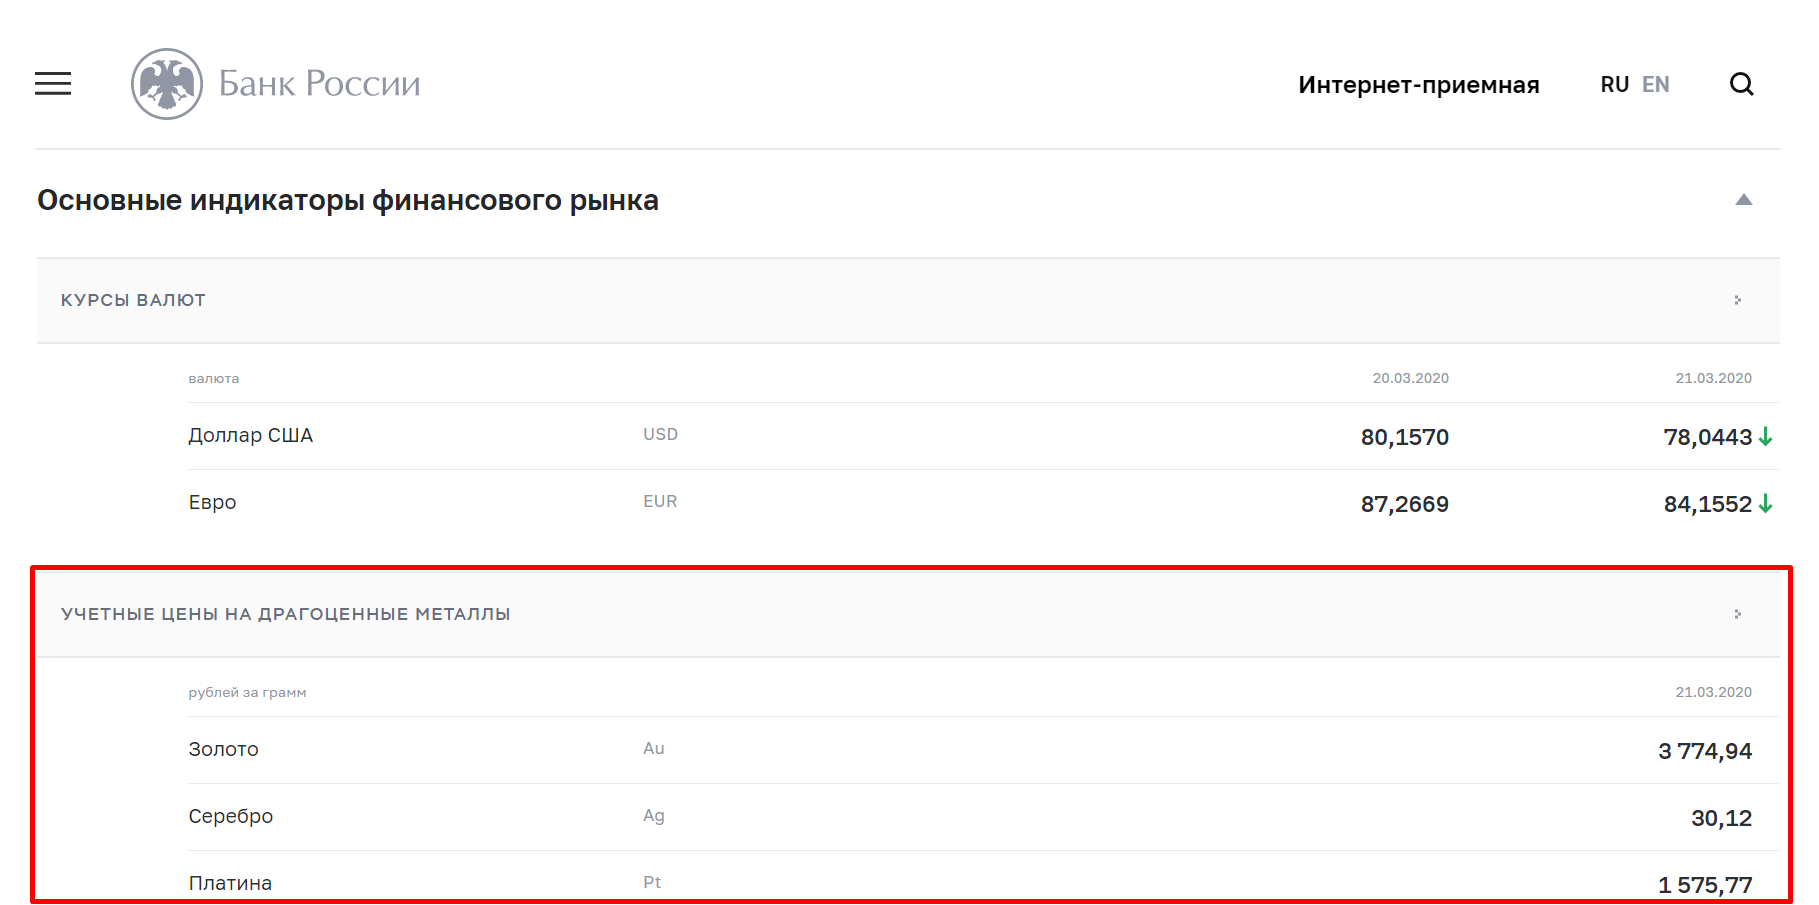
Метод read_html из pandas умеет автоматически находить на HTML-странице таблицы и возвращать их списком из датафреймов:
```
import pandas as pd  
url = 'https://www.cbr.ru/key-indicators/'  
# Таблица с драгметаллами оказалась третьей по счёту  
pd.read_html(url)[2]  
```
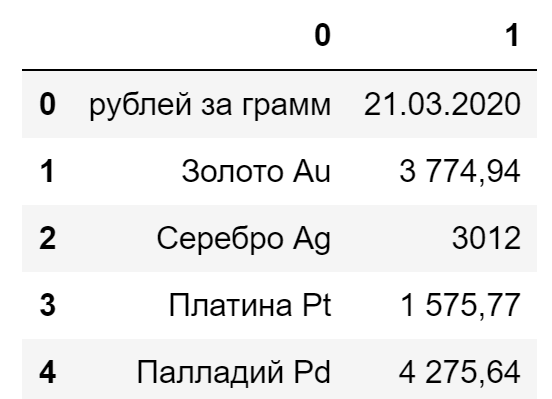
Если этого не происходит, но вы уверены в том, что порядок таблиц на странице неизменен, то можно вручную найти нужную таблицу на странице. Этому случаю посвящены следующие шаги.

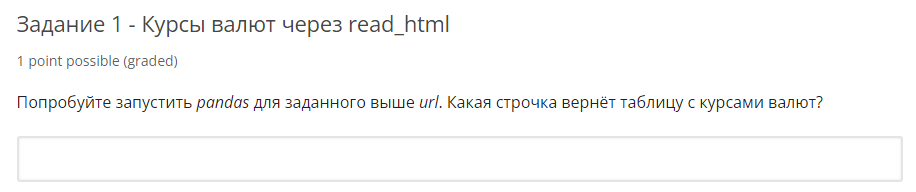

# Поиск таблицы с помощью BeautifulSoup
Более надёжным решением является сначала получить только текст таблицы и передавать в pandas только её. Так же, как и в предыдущем разделе, используем requests и BeautifulSoup, чтобы получить данные со страницы.

А теперь — внимание! В случае работы с сайтом Центробанка нам нужно будет учесть ещё один нюанс. С недавнего времени администраторы стали блокировать обращения к сайту, поступающие не от «живых» пользователей, а от компьютерных программ (в том числе от той, которую мы собираемся написать прямо сейчас). Есть ли шанс в таких условиях всё-таки получить данные, не открывая страницу в браузере?

Безусловно, это возможно. Безвыходных положений вообще не бывает, особенно в программировании! Один из способов справиться с ситуацией — «притвориться» браузером :).

Каждый запрос, отправляемый с помощью команды get, имеет заголовок. Если заголовок не задан явно, то он создаётся автоматически, и туда добавляется информация в том числе о том, кто является субъектом (или источником) запроса — человек или программа. Чтобы «притвориться» браузером, нам просто нужно вручную дописать нужные сведения в этот заголовок. Подробнее о таком подходе можно почитать в этой статье.

Итоговый вариант кода после добавления заголовка должен выглядеть так:
```
from bs4 import BeautifulSoup  
import pandas as pd  
import requests  
  
url = 'https://www.cbr.ru/key-indicators/'
soup = BeautifulSoup(requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}).text, 'html.parser') 
```
Далее нажимаем 'Исследовать элемент' в меню браузера на виджете с драгоценными металлами:
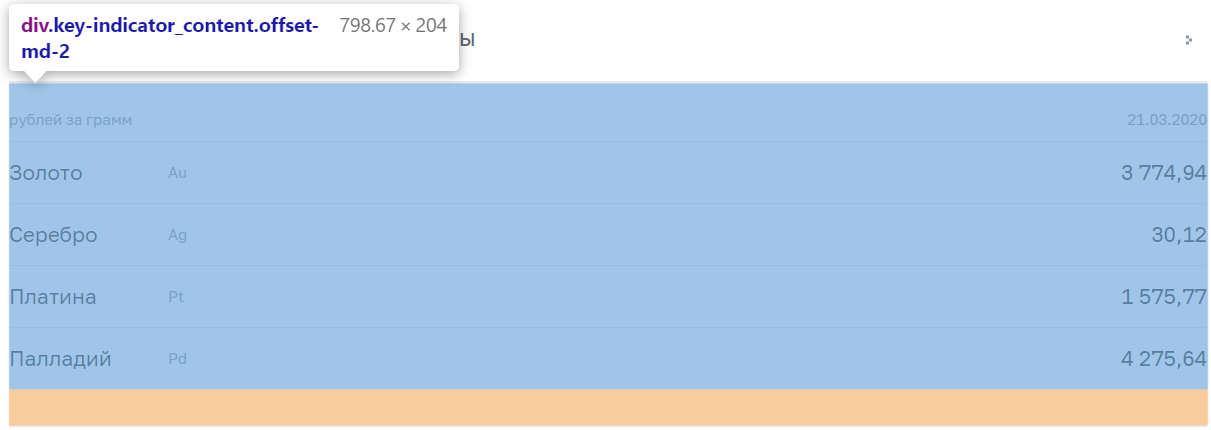
Видим, что виджету соответствует следующая разметка:
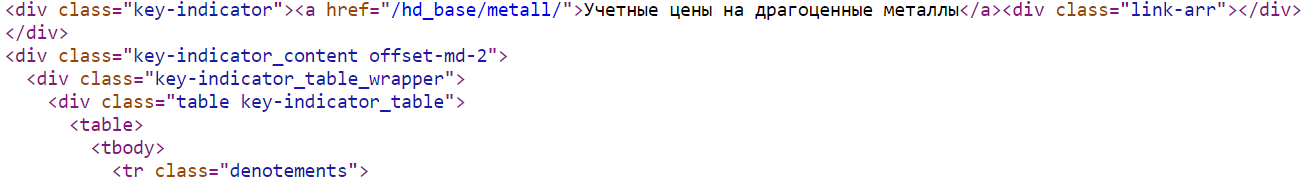
Нам необходимо добраться до кода таблицы, который начинается с тэга ```<table>```. Таблиц на странице много, поэтому указываем путь к таблице виджета драгоценных металлов применяя знания полученные ранее:
```
all_blocks = soup.find_all('div', class_='key-indicator_content offset-md-2')
# Данные таблицы с драгметаллами находятся в третьем блоке
data = all_blocks[2].find('table') 
```
Сейчас наша таблица записана в HTML-коде:
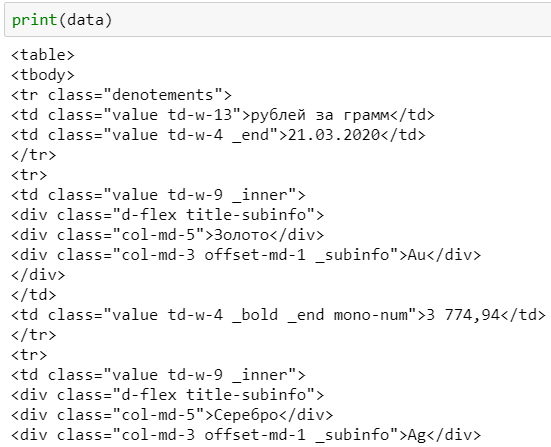
Для перевода ее в датафрейм используем метод read_html. Метод возвращает список датафреймов. В нашем случае датафрейм будет только один, поэтому сразу берем первый элемент:
```
df = pd.read_html(str(data))[0]  
df  
```
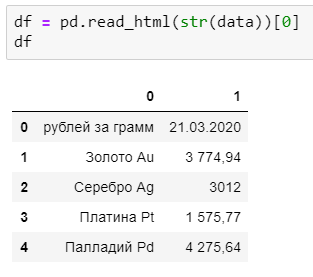
Датафрейм получен! Теперь можно работать с ним средствами Pandas.

# Задание 2 - Рейтинг банков
Напишите программу, которая забирает данные из таблицы рейтинга банков с https://www.banki.ru/banks/ratings/, делает из него датафрейм и сохраняет его в переменую df.

# 12. Введение в API
Введение в API
В предыдущих разделах мы собирали полезную информацию с различных сайтов с выделением правильных тэгов – это довольно трудоёмкая задача. Кроме того, подобные программы могут ломаться в случаях, когда меняется дизайн сайта, его разметка, или владельцы сайтов защищаются от ботов капчей. 

К счастью, многие крупные сайты предоставляют доступ к так называемым API (application programming interface, программный интерфейс приложения). Это специальные разделы сайта, где информацию можно получать без разметки, формат запросов – ответов зафиксирован, и они созданы специально, чтобы облегчить жизнь сторонним разработчикам.

Мы уже видели, как https://www.cbr-xml-daily.ru возвращает данные о валютах в json-формате, и это может считаться API. В этом разделе мы на примере ВКонтакте посмотрим особенности API, характерные для более крупных сайтов.

Сервисный токен
Для того чтобы начать работать с API ВКонтакте, необходимо получить сервисный токен (ключ) авторизации. 

Авторизация применяется практически во всех API, чтобы отдавать данные только их владельцу или контролировать количество запросов в единицу времени. Сервисный токен для нашей задачи создается вместе с новым приложением. Приложение мы делать, конечно, не будем. Оно нужно только для получения токена, чтобы сделать необходимые выгрузки.

Зайдите на страницу https://vk.com/editapp?act=create, чтобы создать приложение (вы должны быть авторизованы ВКонтакте). Дайте приложению любое название и оставьте значение платформы "Standalone-приложение":

После подтверждения создания приложения в приложении ВК или по СМС зайдите в настройки:
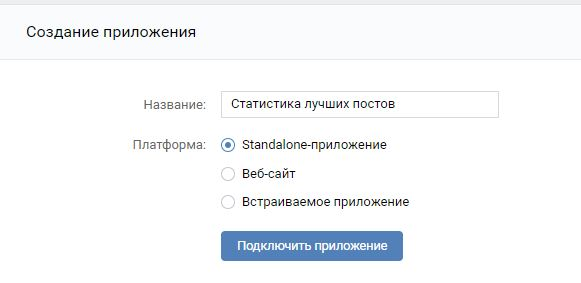
Нужный нам токен лежит в поле "Сервисный ключ доступа".
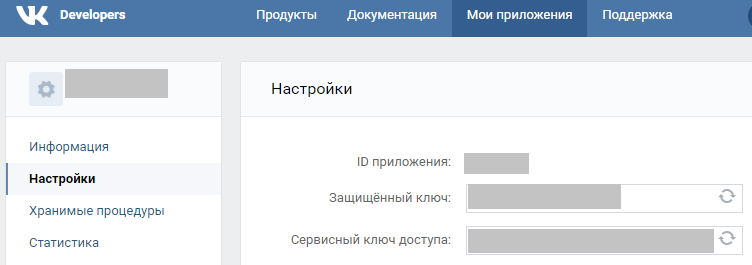

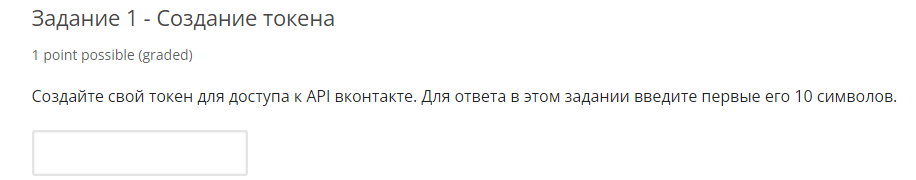

# 13. Запрос к API
Для примера работы с API мы будем получать данные для статистических отчетов произвольной группы, например:
- соотношение мужчин и женщин в группе;
- статистика географии пользователей;
- другие данные для аналитики групп конкурентов.

Сначала рассмотрим работу API на простом примере, на основе которого работают многие системы. 

Перейдите по следующей ссылке в браузере, подставив вместо слова "TOKEN" сервисный токен из прошлого шага:
```
https://api.vk.com/method/users.get?user_id=1&v=5.95&access_token=TOKEN
```
Результат:
```
{"response":[{"id":1,"first_name":"Павел","last_name":"Дуров","is_closed":false,"can_access_closed":true}]}
```
Сейчас мы сделали GET-запрос к API ВКонтакте, который состоит из следующих частей:
- https://api.vk.com/method — домен и URL запроса API: обычно не меняется; 
- users.get — название метода, который отдает определенный отчет; нашем случае это метод для получения информации о пользователе; 
- user_id и v — параметры запроса: идентификатор пользователя, о котором хотим получить информацию, и номер версии API; 
- token, который выдается только пользователям, имеющим право просматривать определенные данные, например, показания счетчиков Яндекс, метрики вашего проекта: на все остальные запросы без корректного токена система отвечает отказом.

Если мы посмотрим документацию метода users.get (https://vk.com/dev/users.get), то увидим, что в ней описано множество других параметров, которые можно получить о пользователе: дата рождения, пол, родной город и другие.

Словом, всё то, что мы видим на странице пользователя в интерфейсе или приложении ВКонтакте (конечно, если пользователь их указал). Добавим к запросу дату рождения и пол (согласно документации, эти параметры надо перечислять в поле fields):
```
https://api.vk.com/method/users.get?user_id=1&v=5.95&fields=sex,bdate&access_token=TOKEN
```
Результат:
```
{"response":[{"id":1,"first_name":"Павел","last_name":"Дуров","is_closed":false,"can_access_closed":true,"sex":2,"bdate":"10.10.1984"}]}  
# Примечание: значение 2 у параметра 'sex' означает мужской пол. 
```

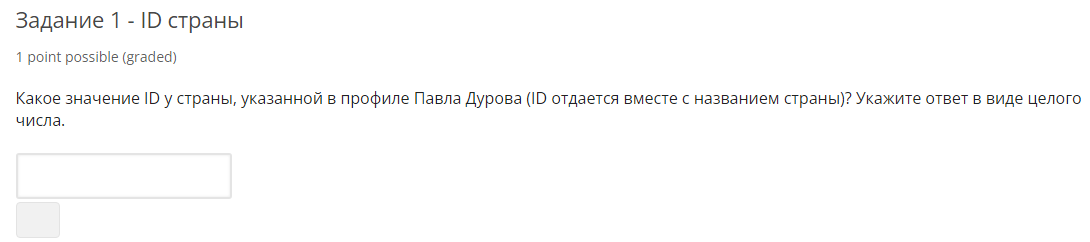

# 14. Запрос к API из кода
Мы делали запрос в браузере, теперь давайте сделаем запрос из кода. Будем пользоваться всё той же библиотекой requests.
```
import requests  
  
url = 'https://api.vk.com/method/users.get'   
params = {'user_id': 1, 'v': 5.95, 'fields': 'sex,bdate', 'access_token': token, 'lang': 'ru'}  
  
# Мы можем выставить параметры запроса через аргумент params  
response = requests.get(url, params=params)  
response.text  
# => '{"response":[{"id":1,"first_name":"Павел","last_name":"Дуров","is_closed":false,"can_access_closed":true,"sex":2,"bdate":"10.10.1984"}]}'
```
Мы получили строку в формате JSON. Как мы помним по первому разделу, её можно преобразовать в словарь методом json и после этого обращаться к различным полям. Кроме того, такие большие вложенные словари нагляднее выводить с помощью функции pprint (~pretty print, красивый вывод), которым мы и воспользуемся
```
from pprint import pprint  
  
pprint(response.json())  
# =>   
# {'response': [{'bdate': '10.10.1984',  
#                'can_access_closed': True,  
#                'first_name': 'Павел',  
#                'id': 1,  
#                'is_closed': False,
#                'last_name': 'Дуров',  
#                'sex': 2}]}  
  
user = response.json()['response'][0]  
  
# Выведем дату рождения  
print(user['bdate'])  
# => 10.10.1984  
  
# Выведем имя  
print(user['first_name'])  
# => Павел  
```
Данный метод позволяет запрашивать сразу много пользователей (до 1000).  Для этого нужно использовать параметр user_ids и передавать id через запятую в строковом формате, например: '1,2,3'.
```
ids = ",".join(map(str, range(1, 4)))  
print(ids)  
# => 1,2,3  
  
params = {'user_ids': ids, 'v': 5.95, 'fields': 'bday', 'access_token': token, 'lang': 'ru'}  
  
pprint(requests.get(url, params=params).json()) 
# {'response': [{'can_access_closed': True,  
#                'first_name': 'Павел',  
#                'id': 1,  
#                ''is_closed': False',  
#                'last_name': 'Дуров'},  
#               {'can_access_closed': False,  
#                'first_name': 'Александра',  
#                'id': 2,  
#                'is_closed': True,  
#                'last_name': 'Владимирова'},  
#               {'deactivated': 'deleted',  
#                'first_name': 'DELETED',  
#                'id': 3,  
#                'last_name': ''}]}
```

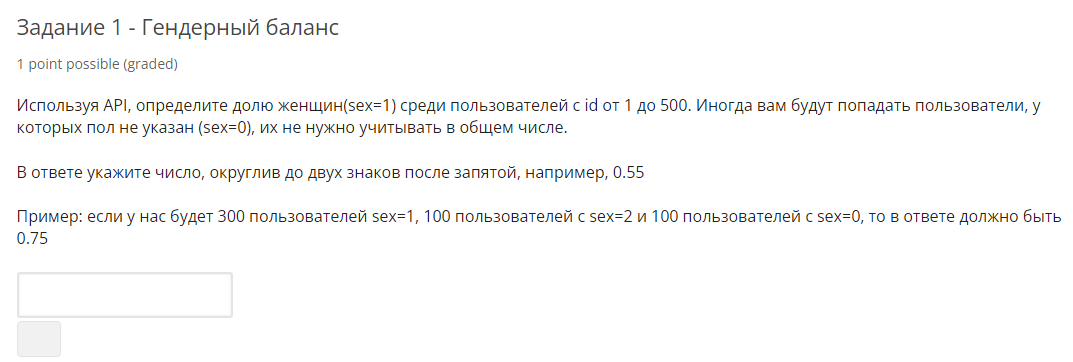

# 15 Ограничения API
В прошлом блоке мы собрали информацию о небольшом наборе пользователей. Теперь перейдем к более реальной задаче — сбору данных о пользователях группы ВКонтакте. 

Стоит отметить, что есть много сервисов, которые выгружают похожую статистику из соцсетей. Однако им свойственны недостатки универсальных решений:
- не могут учитывать всех особенностей вашего проекта;
- считают фиксированный набор метрик, дополнительную обработку данных приходится делать вам;
- не всегда бесплатны и вряд ли позволят работать с большими объемами данных.

В этом разделе мы научимся считать произвольные метрики групп, собирая данные из API. 

В текущем шаге мы научимся работать с двумя ограничениями, которые свойственны практически всем системам:
- ограничение на количество вызовов в единицу времени;
- ограничение на количество выгружаемых строк за один запрос.

Ограничение на количество запросов в секунду сделано для того, чтобы избежать чрезмерной нагрузки на серверы системы. В ряде случаев небольшое количество отчетов можно выгрузить, уложившись в этот лимит (например, как мы получили информацию о 500 пользователях в прошлом упражнении). Однако второе ограничение не удастся «обойти» в случае выгрузки больших отчетов. Например, чтобы получить список всех пользователей очень популярной группы, серверу, возможно, придется отправить вам разом лист из миллионов записей.

Давайте рассмотрим, как работать с этими ограничениями на примере выгрузки списка пользователей группы https://vk.com/vk.

Посмотрим в документации, какие методы нам доступны для групп (https://vk.com/dev/groups). Для получения списка пользователей группы видим метод groups.getMembers(https://vk.com/dev/groups.getMembers).

Согласно документации, обязательным параметром является ID или короткое имя группы. В нашем случае это vk: https://vk.com/vk. Тестируем, как работает метод в самом простом случае:
```
import requests  
url = 'https://api.vk.com/method/groups.getMembers'  
params = {  
    'group_id': 'vk',  
    'v': 5.95,  
    'access_token': token  
}  
response = requests.get(url, params = params)  
data = response.json()  
print(data)  
# => {'response': {'count': 11240724, 'items': [5, 6, 10, 19, 34, 47, 54, 79, 177, 193, 205, 219... 
  
len(data['response']['items'])  
# => 1000
```
### Получаем всех пользователей
Мы видим, что всего пользователей в группе больше 11 000 000, а получили мы только первую тысячу пользователей группы. Судя по описанию параметра count в документации(https://vk.com/dev/api_requests), это максимум, который может отдать API за один раз.

Для получения следующей тысячи пользователей воспользуемся параметрами count и offset: будем в цикле выгружать по 1000 пользователей (count будет всегда равен 1000), а в каждом следующем шаге цикла увеличим смещение offset на величину count.

Сначала напишем цикл выгрузки первых 20 пользователей со значением count = 5. Т.е. цикл будет выгружать за 1 запрос по 5 пользователей, пока не выгрузит первые 20. Это позволит нам проверить корректность работы цикла перед тем, как делать большие и долгие выгрузки.

Давайте выведем на экран первые 20 пользователей из нашей первой попытки с 1000 пользователей, чтобы было с чем сверить результат выгрузки из 20 пользователей:
```
users_for_checking = data['response']['items'][:20]  
print(users_for_checking)  
# => [5, 6, 10, 19, 34, 47, 54, 79, 177, 193, 205, 219, 239, 243, 345, 404, 406, 407, 467, 485]
Теперь используем count и offset, чтобы получить те же id по 5 за раз

count = 5  
offset = 0  
user_ids = []
max_count = 20  
while offset < max_count:  
    print('Выгружаю {} пользователей с offset = {}'.format(count, offset))     
    params = {  
        'group_id': 'vk',  
        'v': 5.95,  
        'count': count,  
        'offset': offset,  
        'access_token': token  
    }     
    # такой же запрос как в прошлый раз  
    r = requests.get(url, params = params)  
    data = r.json()     
    user_ids += data['response']['items']   
  
    # увеличиваем смещение на количество строк выгрузки  
    offset += count  
      
# Выгружаю 5 пользователей с offset = 0  
# Выгружаю 5 пользователей с offset = 5  
# Выгружаю 5 пользователей с offset = 10  
# Выгружаю 5 пользователей с offset = 15  
print(user_ids)  
# => [5, 6, 10, 19, 34, 47, 54, 79, 177, 193, 205, 219, 239, 243, 345, 404, 406, 407, 467, 485]
  
user_ids == users_for_checking  
# => True  
```
Видим, что подход корректно работает. Теперь мы можем получить всех пользователей, выставив ```count = 1000 и max_count = data['response']['count'].```

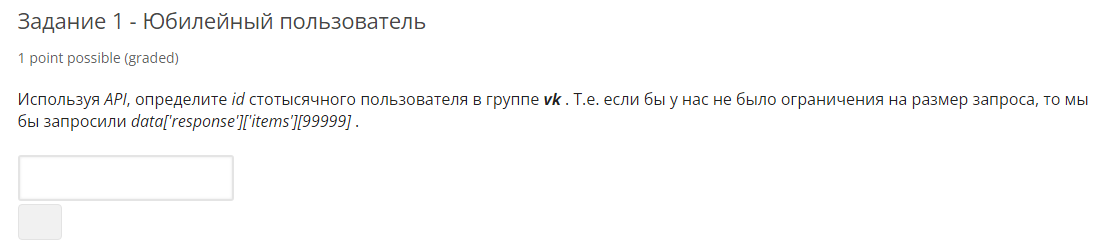

# 16. Ограничение по частоте запросов
Ограничение по частоте запросов
В API частот добавляют ограничение по частоте запросов, чтобы отдельно взятые пользователи слишком сильно не перегружали  сервер. Подобное ограничение есть и у ВКонтакте, в документации которой указано, что можно делать не более 3-х запросов в секунду. 

Чтобы не следить за частотой отправки запросов с секундомером в руках, мы можем после каждого запроса делать паузу. В этом случае, даже если код будет выполняться на самом быстром компьютере, мы не нарушим установленное ограничение, т.к. периодичность отправки запросов будет искусственно замедлена. Воспользуемся библиотекой time и методом sleep (пауза в 0.5 секунды добавлена в конце цикла):
```
import time  
  
count = 1000  
offset = 0  
user_ids = []  
while offset < 10000:  
    print('Выгружаю {} пользователей с offset = {}'.format(count, offset))     
    params = {  
        'group_id': 'vk',  
        'v': 5.95,  
        'count': count,  
        'offset': offset,  
        'access_token': token  
    }    
    # такой же запрос, как в прошлый раз  
    r = requests.get(url, params = params)  
    data = r.json()     
    user_ids += data['response']['items']    
  
    # увеличиваем смещение на количество строк выгрузки  
    offset += count  
    
    print('Ожидаю 0.5 секунды...')  
    time.sleep(0.5)  
```

# 17. Лайки, репосты и комментарии
Ещё одна полезная вещь, которую можно получить,  —  это количество взаимодействий с постами через API новостной ленты(https://vk.com/dev/wall). На данном этапе будем использовать самый простой вариант: берем последние 10 постов группы. Мы продолжаем работать с группой https://vk.com/vk.

Начнем с  формирования запроса к API ВКонтакте методом wall.get():
```
import requests  
from pprint import pprint  
  
url = 'https://api.vk.com/method/wall.get'  
params = {  
    'domain': 'vk',  
    'filter': 'owner',  
    'count': 10,  
    'offset': 0,  
    'access_token': token,  
    'v': 5.95  
}  
response = requests.get(url, params = params)  
response.json()
# => {'response': {'count': 421,
#      'items': [{'id': 1132798, 
#        'from_id': -22822305,
#        'owner_id': -22822305,
#        'date': 1603796912, 
#        'marked_as_ads': 0,  
#        'post_type': 'post',
#        'text': 'Встречайте музыкальных кураторов... 
```
Видим, что сначала идёт общее количество постов, а по ключу 'items'  —  сами посты. Посмотрим на отдельный пост:
```
response.json()['response']['items'][0]  
# {'id': 1132798,  
#  'from_id': -22822305,  
#  'owner_id': -22822305,  
#  'date': 1603796912,  
#  'marked_as_ads': 0,  
#  'post_type': 'post',  
#  'text': 'Встречайте музыкальных кураторов — и погружайтесь в стили от хип-хопа до классики...
# ...  
#  'post_source': {'type': 'vk'},
#  'comments': {'count': 1150, 'can_post': 1, 'groups_can_post': True},
#  'likes': {'count': 1761, 'user_likes': 0, 'can_like': 1, 'can_publish': 1},     
#  'reposts': {'count': 260, 'user_reposted': 0},   
#  'views': {'count': 756183}}
```
Нужная нам статистика находится в полях 'comments', 'likes' и 'reposts'. Соберем итоговую статистику для каждого поста в словарь stats. В качестве ключа будем использовать начало статьи, в качестве значения — список с тремя интересующими нас метриками и временем публикации: [комментарии, лайки, репосты, дата публикации]
```
stats = {}  
              
for record in response.json()['response']['items'][:]:  
    title = record['text'][:30]  
    if title:  
        stats[title] = [record['comments']['count'], record['likes']['count'], record['reposts']['count'], record['date'] ]  
pprint(stats)  
  
# => {'Встречайте музыкальных куратор': [1150, 1762, 260, 1603796912], 
#     'Встречать день рождения приятн': [763, 2946, 106, 1602320413],
#     'Обмениваться сообщениями ВКонт': [1382, 2079, 258, 1601370979], 
#     'Получать поздравления приятно,': [1189, 2329, 94, 1602506077],
#     'Помните то чувство, когда полу': [153, 643, 108, 1600864213],
#     'Скоро начнётся розыгрыш суперп': [3453, 8953, 293, 1602338438], 
#     'Совсем скоро нам исполнится 14': [538, 1828, 159, 1601624922],
#     'Уже завтра нам исполнится 14 л': [1395, 2786, 168, 1602238852]}
```

# Задание 1 - SMM index
Напишите функцию get_smm_index(group_name, token), которая по имени группы и авторизационному токену API возвращает smm_index группы - сумму лайков, комментариев и репостов для последних 10 постов, поделённую на количество участников в группе.
```
token = '...'
get_smm_index('vk', token)
# => 0.00337003
```

# 18. Возможности API
Мы рассмотрели базовое взаимодействие с пользователями и группами. ВКонтакте предоставляет достаточно широкие возможности в своём API: по сути, всё, что можно делать руками через браузер, доступно и в API. Обратим внимание: если вы размещаете рекламу в Вконтакте, то можно выгружать всю статистику через ads API(https://vk.com/dev/ads).

Полный список методов можно посмотреть в документации - https://vk.com/dev/methods

# 19. Заключение
В данном модуле мы рассмотрели, как можно доставать информацию для анализа напрямую из интернета. Давайте вспомним, чем мы занимались:

рассмотрели, как работает протокол http и разметка с html; 
делали http-запросы из кода с помощью библиотеки requests; 
разбирали html-страницы с помощью BeautifulSoup и искали данные в них; 
загружали данные из веб-таблиц в DataFrame pandas; 
посмотрели на базовую работу с API на примере ВКонтакте: получение токена, запросы, обход основных ограничений.
Надеемся, что модуль был вам полезен, и вы сможете использовать полученные знания на практике.

# 20. Итоговый тест
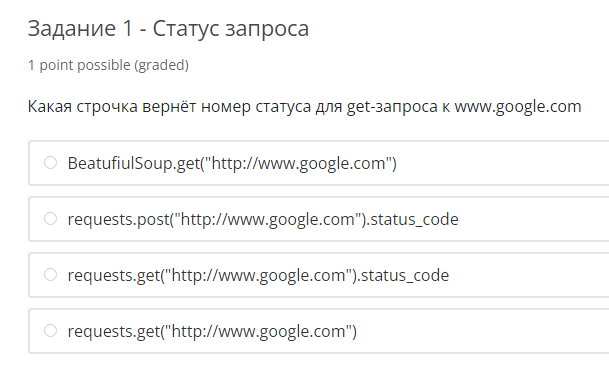

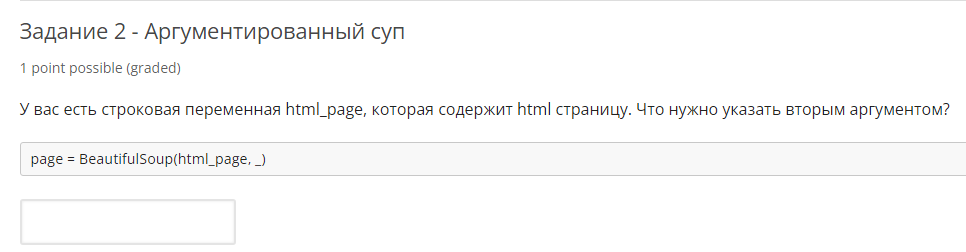

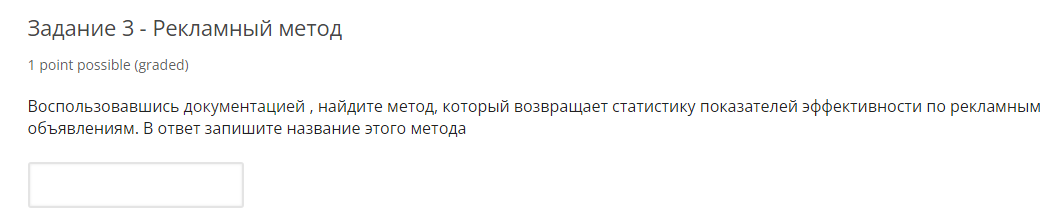

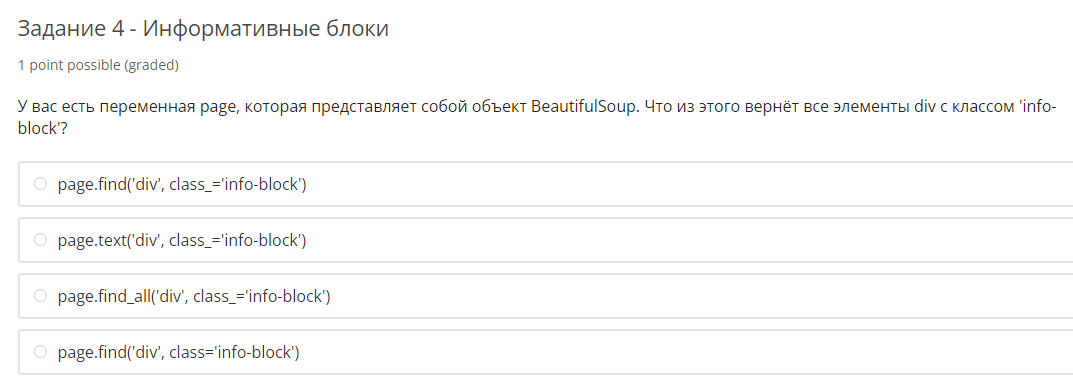